# Projeto Unidade 1 - Redes Temporais de Co-Autoria

<h3> Objetivo Geral </h3>

O trabalho proposto tem como objetivo reforçar **conceitos de grafos** utilizando a biblioteca **NetworkX** no Python. A ideia central é que vocês, individualmente ou em duplas, criem e manipulem uma **rede de co-autoria** a partir de **dados reais** extraídos **PPgEEC**.

Os requisitos estão descritos no arquivo: [U1P1.pdf](./U1P1.pdf)

# Requisito 1

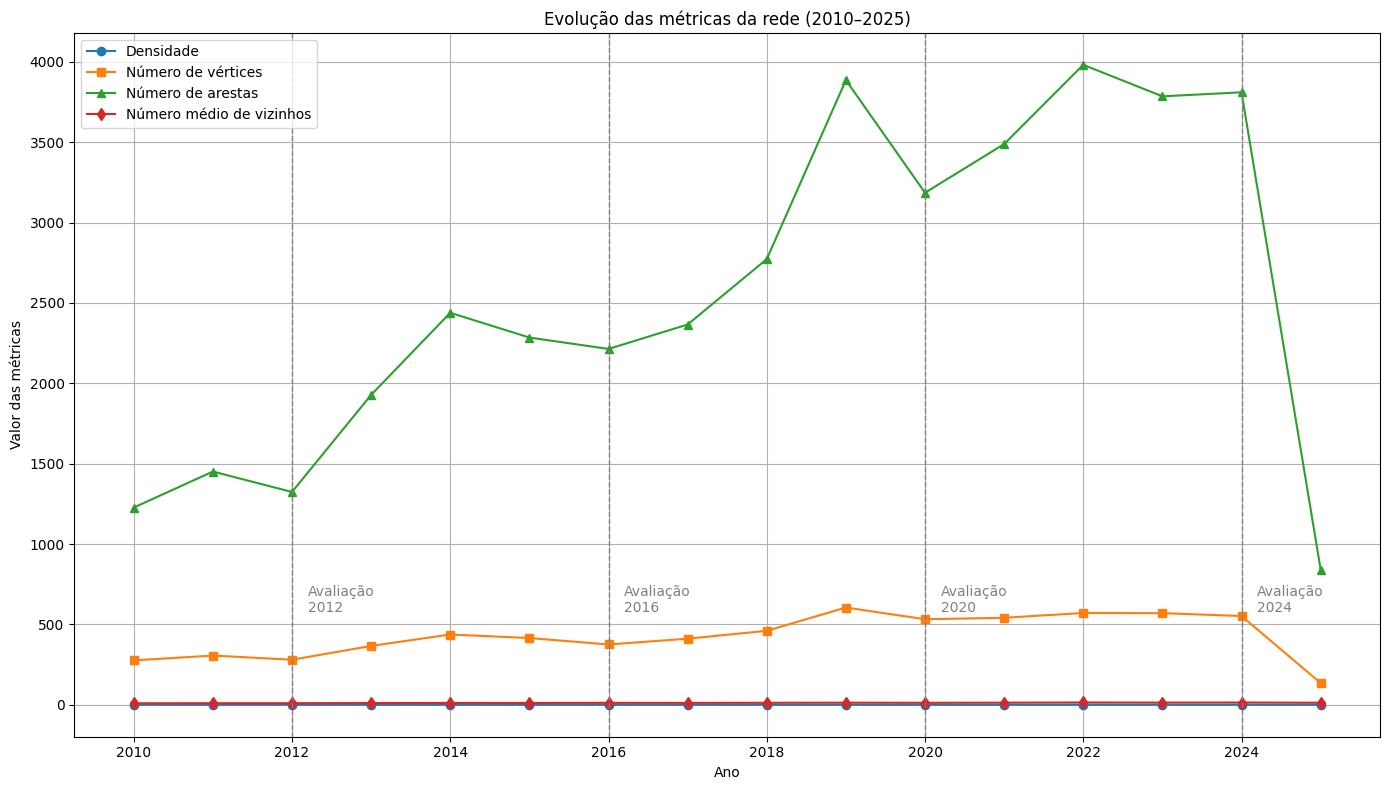

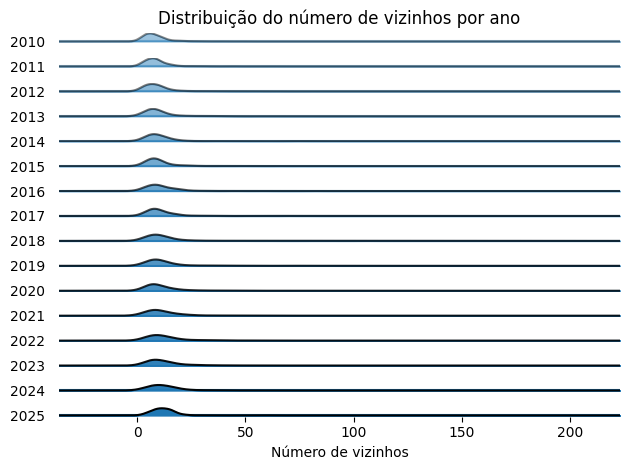

In [3]:
import os
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# Coleta de dados
pasta = "./anos"
anos = list(range(2010, 2026))

densidade = []
num_vertices = []
num_arestas = []
graus_medios = []
dados_graus = []

for ano in anos:
    caminho = f"{pasta}/{ano}_authors_network.gexf"

    if not os.path.exists(caminho):
        densidade.append(None)
        num_vertices.append(0)
        num_arestas.append(0)
        graus_medios.append(0)
        continue

    G = nx.read_gexf(caminho)
    densidade.append(nx.density(G))
    num_vertices.append(G.number_of_nodes())
    num_arestas.append(G.number_of_edges())

    graus = dict(G.degree())
    media = sum(graus.values()) / len(graus) if graus else 0
    graus_medios.append(media)

    for grau in graus.values():
        dados_graus.append({"Ano": ano, "Grau": grau})

# Parte 1: Gráfico das métricas
plt.figure(figsize=(14, 8))
plt.plot(anos, densidade, label="Densidade", marker='o')
plt.plot(anos, num_vertices, label="Número de vértices", marker='s')
plt.plot(anos, num_arestas, label="Número de arestas", marker='^')
plt.plot(anos, graus_medios, label="Número médio de vizinhos", marker='d')

avaliacoes = [2012, 2016, 2020, 2024]
for marco in avaliacoes:
    plt.axvline(x=marco, color='gray', linestyle='--', linewidth=1)
    plt.text(marco + 0.2, max(num_vertices)*0.95, f"Avaliação\n{marco}", color='gray')

plt.title("Evolução das métricas da rede (2010–2025)")
plt.xlabel("Ano")
plt.ylabel("Valor das métricas")
plt.legend(facecolor='white')  # Define o fundo da legenda como branco
plt.grid(True)
plt.tight_layout()
plt.show()

# Parte 2: Ridgeline Chart com Joypy
import joypy

df = pd.DataFrame(dados_graus)

# Organize os dados para o Joypy
dados_anos = [df[df['Ano'] == ano]['Grau'].values for ano in anos]

# Ajustando o gráfico de ridgeline
fig, axes = joypy.joyplot(
    data=dados_anos,
    labels=anos,
    title="Distribuição do número de vizinhos por ano",
    fade=True
)

# Ajustes finais no gráfico
plt.xlabel("Número de vizinhos")
plt.ylabel("")
plt.tight_layout()
plt.show()



# Requisito 2

Top 5 autores em 2010-2012:
  MARCELO SAMPAIO DE ALENCAR (grau: 164)
  LUIZ MARCOS GARCIA GONCALVES (grau: 129)
  ANDRES ORTIZ SALAZAR (grau: 97)
  LUIZ AFFONSO HENDERSON GUEDES DE OLIVEIRA (grau: 95)
  FLAVIO BEZERRA COSTA (grau: 89)


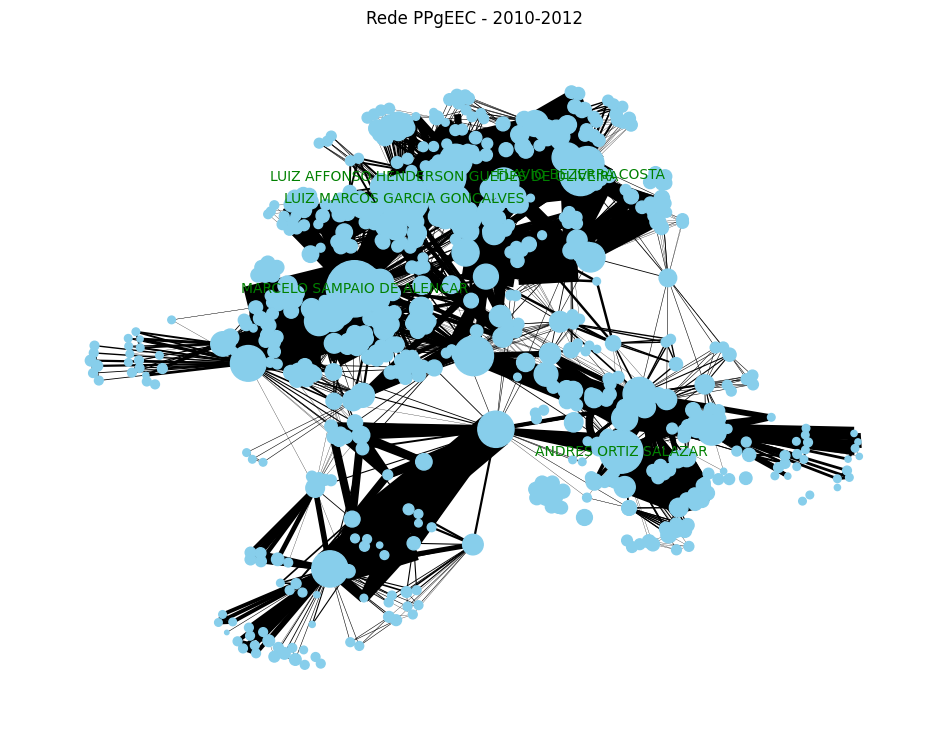

Top 5 autores em 2013-2016:
  MARCELO SAMPAIO DE ALENCAR (grau: 266)
  LUIZ MARCOS GARCIA GONCALVES (grau: 219)
  MARCELO AUGUSTO COSTA FERNANDES (grau: 198)
  SEBASTIAN YURI CAVALCANTI CATUNDA (grau: 188)
  LUIZ AFFONSO HENDERSON GUEDES DE OLIVEIRA (grau: 180)


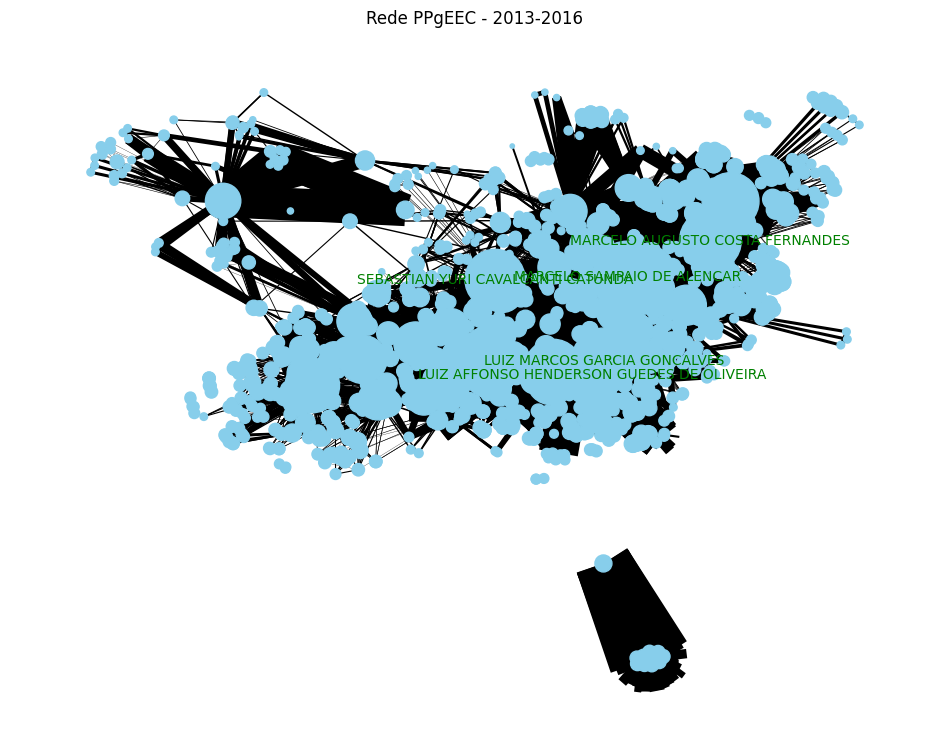

Top 5 autores em 2017-2020:
  MARCELO SAMPAIO DE ALENCAR (grau: 293)
  LUIZ MARCOS GARCIA GONCALVES (grau: 288)
  IVANOVITCH MEDEIROS DANTAS DA SILVA (grau: 256)
  MARCELO AUGUSTO COSTA FERNANDES (grau: 248)
  FLAVIO BEZERRA COSTA (grau: 185)


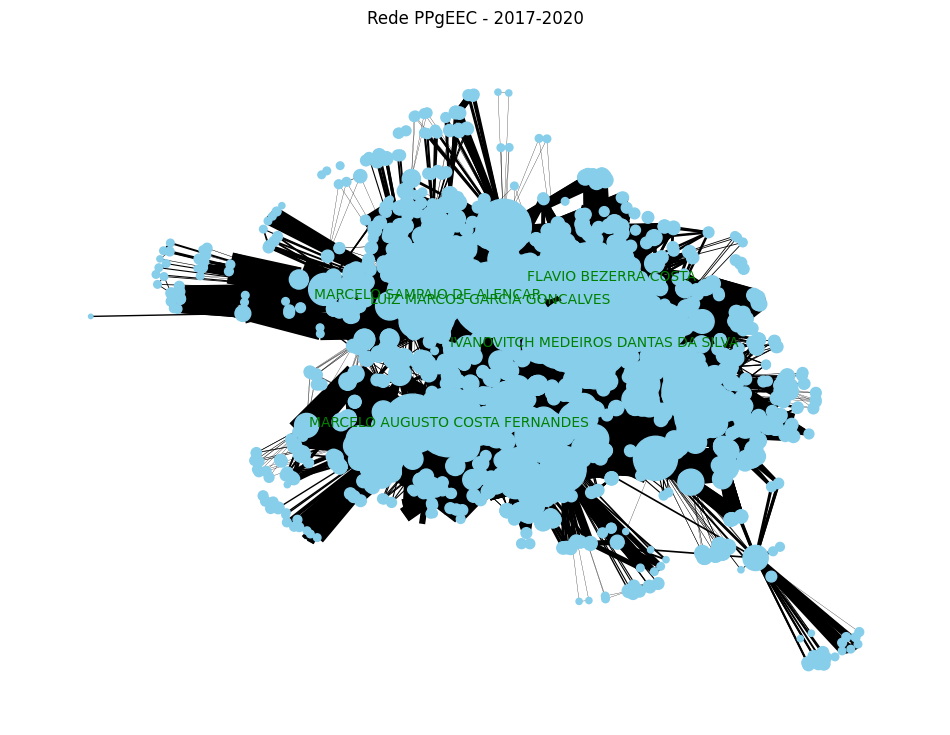

Top 5 autores em 2021-2024:
  RICARDO ALEXSANDRO DE MEDEIROS VALENTIM (grau: 401)
  MARCELO AUGUSTO COSTA FERNANDES (grau: 308)
  MARCELO SAMPAIO DE ALENCAR (grau: 291)
  IVANOVITCH MEDEIROS DANTAS DA SILVA (grau: 272)
  LUIZ MARCOS GARCIA GONCALVES (grau: 266)


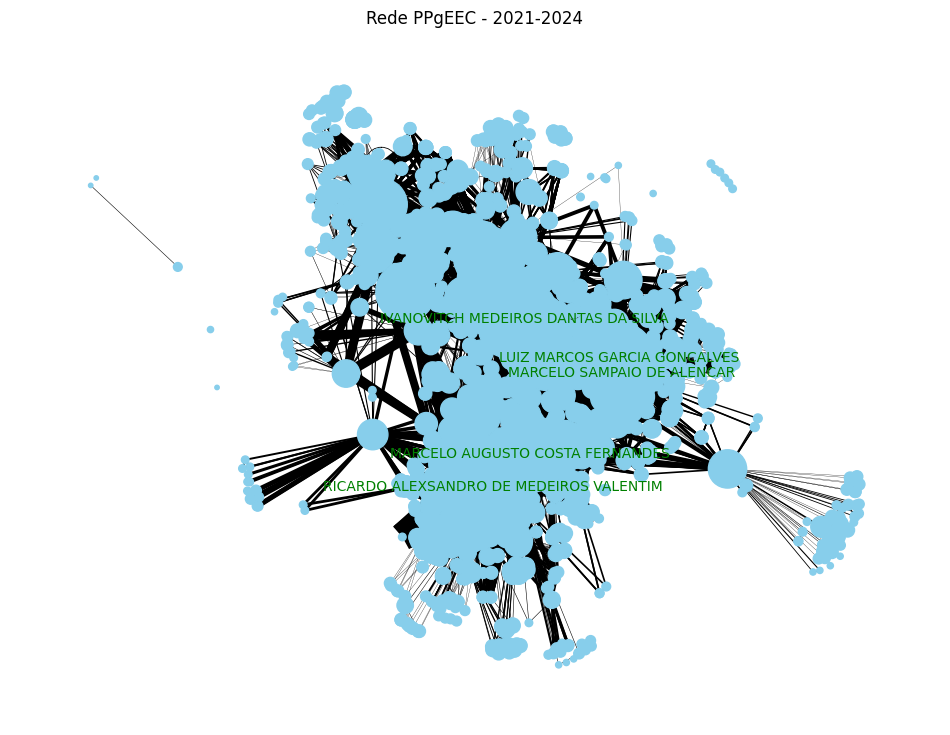

In [2]:
import os
import networkx as nx
import matplotlib.pyplot as plt

periodos = {
    "2010-2012": "2010-2012",
    "2013-2016": "2013-2016",
    "2017-2020": "2017-2020",
    "2021-2024": "2021-2024",
}

pasta_avaliacoes = "./avaliacao_geral"

# Itera sobre os períodos definidos
for nome, nome_arquivo in periodos.items():

    caminho = f"{pasta_avaliacoes}/{nome_arquivo}.gexf"
    
    if not os.path.exists(caminho):
        print(f"Arquivo não encontrado: {caminho}")
        continue
    
    G = nx.read_gexf(caminho)

    graus = dict(G.degree())

    # Define a cor de cada aresta:
    # Vermelha se ambos os vértices forem membros permanentes (is_permanent == true)
    # Preta caso contrário
    cores_arestas = [
        'red' if (G.nodes[e[0]].get("is_permanent") == 'true' and G.nodes[e[1]].get("is_permanent") == 'true')
        else 'black' for e in G.edges
    ]

    # Define a largura das arestas com base na quantidade de citações (citation_num)
    larguras = [
        float(G.edges[e].get("citation_num", 1)) / 5.0 for e in G.edges
    ]

    # Define o tamanho de cada vértice proporcional ao seu grau (número de vizinhos)
    tamanhos = [graus[n] * 10 for n in G.nodes]

    # Gera o layout da rede (posição dos nós), fixando a semente para manter visual consistente
    pos = nx.spring_layout(G, seed=42)

    plt.figure(figsize=(12, 9))
    nx.draw_networkx_nodes(G, pos, node_size=tamanhos, node_color='skyblue')
    nx.draw_networkx_edges(G, pos, edge_color=cores_arestas, width=larguras)

    # Identifica os 5 vértices com maior número de vizinhos
    top5 = sorted(graus.items(), key=lambda x: x[1], reverse=True)[:5]
    print(f"Top 5 autores em {nome}:")
    for n, grau in top5:
        print(f"  {G.nodes[n]['complete_name']} (grau: {grau})")

    # Cria um dicionário de rótulos contendo o nome completo desses top 5 autores
    labels = {n: G.nodes[n]["complete_name"] for n, _ in top5}

    # Desenha os rótulos apenas para os top 5 vértices
    nx.draw_networkx_labels(G, pos, labels, font_size=10, font_color='green', font_family='sans-serif')
    
    plt.title(f"Rede PPgEEC - {nome}")
    plt.axis('off')
    plt.show()


# Requisito 3

Densidade - grafo geral: 0.008675902401164717
Densidade - subgrafo: 0.22466236054022315


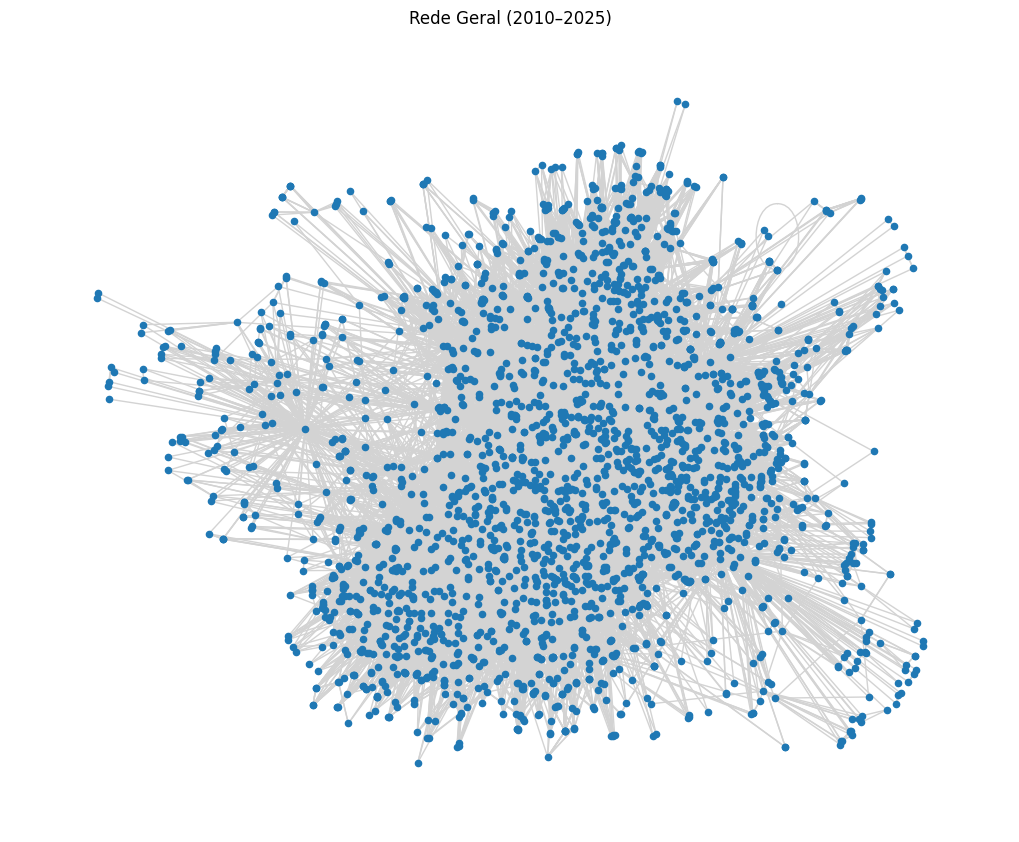

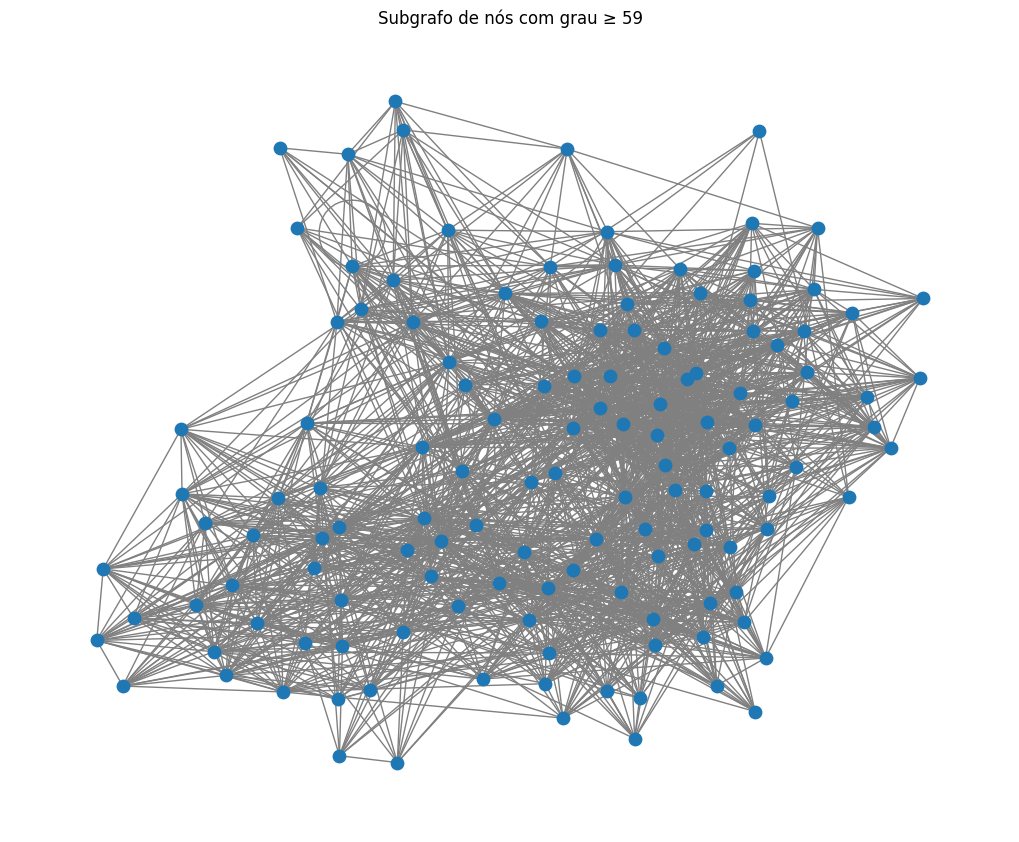

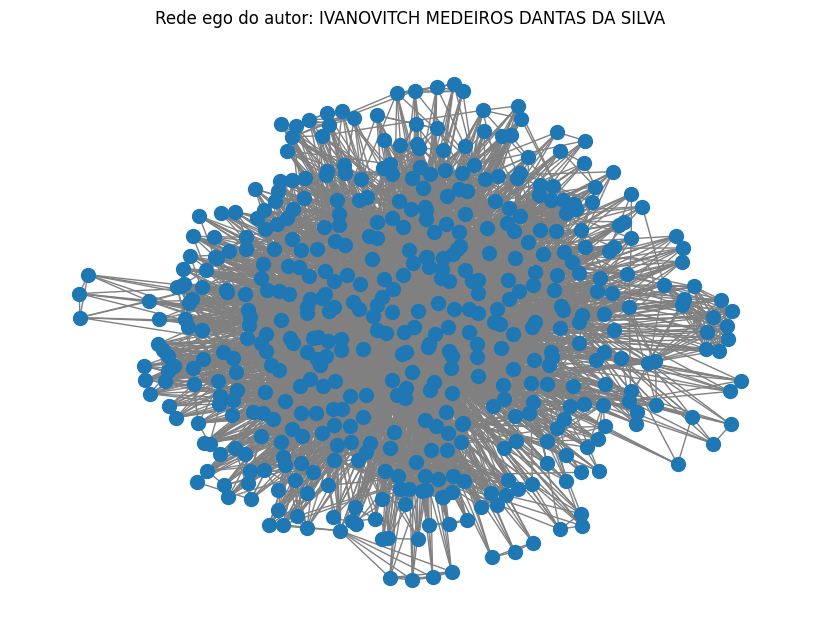

In [4]:
import numpy as np

# Leitura da rede geral
G_geral = nx.read_gexf("./avaliacao_geral/2010-2025.gexf")

# Cálculo dos graus
graus = dict(G_geral.degree())
valores = list(graus.values())

# Definição de X: média + desvio padrão
media = np.mean(valores)
std = np.std(valores)
X = int(media + std)

# Criação do subgrafo: nós com grau ≥ X
nodos_filtrados = [n for n, g in graus.items() if g >= X]
subG = G_geral.subgraph(nodos_filtrados)

# Densidade das redes
dens_geral = nx.density(G_geral)
dens_sub = nx.density(subG)

print("Densidade - grafo geral:", dens_geral)
print("Densidade - subgrafo:", dens_sub)

# Visualização da rede geral
pos_geral = nx.spring_layout(G_geral, seed=42)
plt.figure(figsize=(10, 8))
nx.draw(G_geral, pos_geral, node_size=20, edge_color='lightgray')
plt.title("Rede Geral (2010–2025)")
plt.axis('off')
plt.show()

# Visualização do subgrafo
pos_sub = nx.spring_layout(subG, seed=42)
plt.figure(figsize=(10, 8))
nx.draw(subG, pos_sub, node_size=80, edge_color='gray')
plt.title(f"Subgrafo de nós com grau ≥ {X}")
plt.axis('off')
plt.show()

# Visualização da rede ego
ego_id = [n for n, data in G_geral.nodes(data=True) if data.get("complete_name") == "IVANOVITCH MEDEIROS DANTAS DA SILVA"][0]
ego = nx.ego_graph(G_geral, ego_id)

plt.figure(figsize=(8, 6))
nx.draw(ego, nx.spring_layout(ego, seed=42), node_size=100, edge_color='gray')
plt.title(f"Rede ego do autor: {G_geral.nodes[ego_id]['complete_name']}")
plt.axis('off')
plt.show()
